In [2]:
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
from nltk import ngrams
import nltk
from nltk.corpus import stopwords
# nltk.download('words')
# nltk.download('stopwords')
stopwords = stopwords.words('english')
import io
import spacy
#nlp = spacy.load('en', disable=['parser'])
nlp = spacy.load('en')



import matplotlib.pyplot as plt
%matplotlib inline

### Tokenize the text using Spacy

In [3]:
def get_words_list_season(season):
    token_list = []
    with io.open(r'SiliconValley/filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        for line in f:
            doc = nlp(line)
            for token in doc:
                token_list.append(token)
    return token_list
                
token_list_season = get_words_list_season('01')
            

def get_words_list_all():
    all_token_list = []
    season_list = [format(i, '02d') for i in range(1, 5)] 
    for season in season_list:
        token_list = get_words_list_season(season)
        all_token_list.extend(token_list)
    return all_token_list 
        
all_token_list = get_words_list_all()                                             
    


filter the stopwords, filter the punctuation, filter the human name, filter the interjection

In [4]:
name_list = ['richard', 'gavin', 'hooli', 'gregory', 'jared', 'perter', 'erlich', 'dinesh', 'belson', 'monica']

words_list = []
for token in token_list_season:
    lower = token.text.lower()
    if token.is_punct == False and token.is_space == False and token.is_digit == False and token.pos_ != 'INTJ':
        if lower not in stopwords and "'" not in lower and lower not in name_list and token.lemma_ != '-PRON-':
            words_list.append(token.text.lower())

cnt = Counter(words_list)

print(cnt.most_common(50))

[('know', 228), ('like', 146), ('right', 136), ('pied', 102), ('think', 102), ('guys', 101), ('piper', 101), ('get', 94), ('got', 88), ('go', 87), ('mean', 87), ('one', 82), ('gon', 81), ('na', 81), ('going', 80), ('would', 78), ('really', 77), ('peter', 70), ('could', 70), ('see', 69), ('need', 66), ('company', 64), ('look', 60), ('let', 60), ('good', 58), ('want', 57), ('back', 55), ('time', 52), ('fuck', 51), ('big', 51), ('great', 51), ('ca', 49), ('something', 48), ('fucking', 47), ('dollars', 47), ('even', 47), ('better', 46), ('come', 45), ('guy', 44), ('shit', 43), ('man', 42), ('name', 42), ('make', 41), ('take', 41), ('actually', 41), ('head', 40), ('lot', 40), ('people', 39), ('way', 38), ('maybe', 38)]

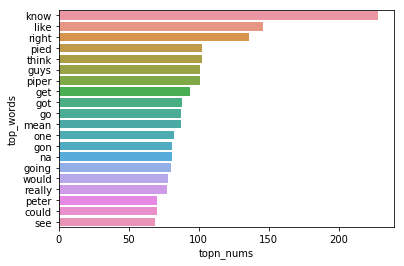

In [5]:
def plot_word_count():
    topn = 20
    cnt = Counter(words_list)
    most_common = cnt.most_common(topn)
    top_words = [each[0] for each in most_common]
    topn_nums = [each[1] for each in most_common]
    df = pd.DataFrame(dict(top_words=top_words, topn_nums=topn_nums))
    
 
    ax = sns.barplot(x="topn_nums", y="top_words", data=df)

plot_word_count()

### N-grams .
first of all, make a list of lists where each internal list is a sentence that is tokenized into words.

In [54]:
def get_sents_list_season(season):
    sents_list = []
    with io.open(r'SiliconValley/filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        lines = f.read()
        lines = lines.replace('\n', ' ')
        
        doc = nlp(lines)
        for sent in doc.sents:
            #print('each sent', sent)
            if len(sent) > 0:
                sents_list.append(sent)
                
    sents_token_list = []
    for sent in sents_list:
        token_list = [token for token in sent]
        sents_token_list.append(token_list)
        
    return sents_token_list


def get_sents_list_all():
    sents_token_list_all = []
    season_list = [format(i, '02d') for i in range(1, 5)] 
    for season in season_list:
        sents_token_list_season = get_sents_list_season(season)
        sents_token_list_all.extend(sents_token_list_season)
        
    return sents_token_list_all

sents_token_list_all = get_sents_list_all()
#sents_token_list_season = get_sents_list_season('01')

In [55]:
sents_token_list = sents_token_list_all
sentences = [[token.text.lower() for token in sent if token.is_punct==False and token.is_space==False] for sent in sents_token_list]

def analyze_ngrams(n):
    cnt = Counter()
    for sent in sentences:
        if len(sent) >= n:
            cnt.update(" ".join(n) for n in ngrams(sent, n))
    
    print(cnt.most_common(20))
    return cnt


cnt = analyze_ngrams(4)



[("i do n't know", 125), ("i 'm gon na", 85), ("i 'm going to", 54), ("i do n't think", 45), ("we 're gon na", 38), ("you 're gon na", 38), ("i do n't want", 33), ("do n't want to", 33), ('what are you doing', 29), ('what do you mean', 28), ("'re not gon na", 27), ('world a better place', 24), ("you 're going to", 24), ("do n't have to", 23), ('the world a better', 23), ("why do n't you", 22), ("i 'd like to", 21), ("you do n't have", 21), ("i 'm not going", 21), ("we 're going to", 21)]

[("i do n't", 354), ("do n't know", 142), ("i 'm not", 135), ("i 'm sorry", 123), ("you do n't", 116), ("it 's a", 115), ('you know what', 97), ("i 'm gon", 85), ("'m gon na", 85), ("it 's not", 84), ("i did n't", 82), ('what the fuck', 81), ("'re gon na", 81), ("i ca n't", 80), ('a lot of', 77), ('what do you', 76), ("you 're not", 68), ("do n't think", 62), ("it 's just", 62), ('what are you', 62)]

[("i do n't", 354), ("do n't know", 142), ("i 'm not", 135), ("i 'm sorry", 123), ("you do n't", 116), ("it 's a", 115), ('you know what', 97), ("i 'm gon", 85), ("'m gon na", 85), ("it 's not", 84)]

[("i do n't know", 125), ("i 'm gon na", 85), ("i 'm going to", 54), ("i do n't think", 45), ("we 're gon na", 38), ("you 're gon na", 38), ("i do n't want", 33), ("do n't want to", 33), ('what are you doing', 29), ('what do you mean', 28), ("'re not gon na", 27), ('world a better place', 24), ("you 're going to", 24), ("do n't have to", 23), ('the world a better', 23), ("why do n't you", 22), ("i 'd like to", 21), ("you do n't have", 21), ("i 'm not going", 21), ("we 're going to", 21)]

[("i do n't know", 125), ("i 'm gon na", 85), ("i 'm going to", 54), ("i do n't think", 45), ("we 're gon na", 38), ("you 're gon na", 38), ("i do n't want", 33), ("do n't want to", 33), ('what are you doing', 29), ('what do you mean', 28)]

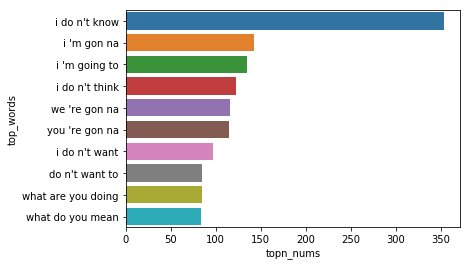

In [58]:

def plot_ngram(N, top_n):
    cnt = analyze_ngrams(N)
    topn_list = cnt.most_common(top_n)
    topn_words = [each[0] for each in topn_list]
    print(topn_list)
    topn_nums = [each[1] for each in topn_list]
    # print(topn_nums)
    
    df = pd.DataFrame(dict(top_words=topn_words, topn_nums=topn_nums))
    sns.barplot(x="topn_nums", y="top_words", data=df)

    
    
plot_ngram(3, 10)
plot_ngram(4, 10)

### Sentence length.

In [61]:
import numpy as np


length_list = [len(s) for s in sentences]
df = pd.DataFrame(dict(length=length_list, sentence=sentences))
long_sents = list(df[df.length > 45].sentence)

print('below is the sentences that has more than 45 words')
for s in long_sents:
    print(' '.join(s))
    
print('words of the loggest sentence: %s' % max(length_list))
print('words of the average sentence: %s' % np.mean(length_list))








below is the sentences that has more than 45 words

look when it blows up and it will once it reaches a critical mass of users pied piper will be able to search the whole world of recorded music to find out if there 's a match to see if you 're infringing on any copy righted material

you know if a guy 's dick was long enough it would be able to reach up or down to another guy with a different d2f. the longer the dick the greater the d2f bridge but i would still be able to jerk it off in one smooth motion

peter used to say that every successful company could look back at a defining moment early on where they would have died had it not been for the-- the courage and the tenacity and maybe the insanity of one visionary person who put it all on the line even though it seemed like a huge mistake at the time

'cause you know i want to have cunty come visit me for lunch and if i ca n't call cunty cunty then it 's like i 'm not going to want to have cunty over at all which i feel like kind of violates my rights--

my feeling is if you 're the ceo of a company and you 're dumb enough to leave your login info on a post it note on your desk while the people that you fucking ripped off are physically in your office it 's not a hack

which is why i had no recourse but to rule that since mr. hendricks by his own admission used hooli equipment to facilitate the development of pied piper then pursuant to california labor code hooli has a right to ownership of pied piper 's underlying ip

and i probably ca n't say how fucking pissed off i am that laurie bream is out there gallivanting around the valley interviewing every dickhole on earth for my job including big head-- a man that i fired by the way and no offense i like him

so you are going to go in your little fucking piggy bank right now and pay back every fucking kopeck that you stole from big head and if you do n't we 're gon na take our little show on the road perhaps perform it for a man named the d.a. ridiculous

so if it makes any difference i 'd like to vie for a lesser sentence if after he makes full restitution he would write a very convincing public apology preferably-- mr. bachmann an action like this is very expensive and time consuming and as you 've already pointed out even if you do prevail the money is gone unless you win a court order allowing you to raid other innocent people 's bank accounts and that 's a tough sell even for a plaintiff who 's more uh sympathetic

i see two able bodied entitled young white men who lucked into more money than most people see in five lifetimes and who if they had n't had their millions stolen would have promptly squandered them on more things like relocated swimming pools and lost tiki heads

okay so i just spoke with my friend who runs a market research firm she 's gon na set up a focus group for the platform put it in the hands of some real users and hopefully it 'll be super obvious what 's going wrong